# Titanic

Observar detenidamente los siguientes gráficos. NO importa si no entienden el código con el que se generaron.
* ¿Qué conclusiones pueden extraer de ellos?
* ¿Cuáles utilizarían para justificar la validez o no de la siguiente afirmación: *En el Titanic, al momento de sobrevivir, era favorable pertenecer a una clase alta que a una clase baja*?

Opcionalmente, pueden usar como información *a priori* las siguientes conclusiones de análisis anteriores:
* Las mujeres tienen una probabilidad más alta de supervivencia que los hombres.
* Los bebes y niños tienen una probabilidad más alta de supervivencia que los adolescentes, adultos y ancianos.



In [ ]:
clase alta clase baja 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [9]:
### Carga de datos
#df = pd.read_csv('titanic.csv', delimiter='\t')
df = sns.load_dataset('titanic')


In [3]:
'''
Esta es una funcion que, dada la edad, indica a que rango etario pertenece
'''
def de_edad_a_rango_etario(edad):
    if 0<edad<=3:
        return 'bebe'

    if 3<edad<=12:
        return 'ninio'
    
    if 12<edad<=18:
        return 'adolescente'
    
    if 18<edad<=60:
        return 'adulto'
    
    if 60<edad:
        return 'anciano'
    

In [10]:
'''
Aca creamos una nueva columna en el dataframe y la llenamos aplicando la funcion que definimos antes a todos los elementos de la columna edad.
'''
df['rango_etario'] = df.age.apply(lambda edad: de_edad_a_rango_etario(edad))
df[['age', 'rango_etario']].head(5)

,age,rango_etario
0,22.0,adulto
1,38.0,adulto
2,26.0,adulto
3,35.0,adulto
4,35.0,adulto


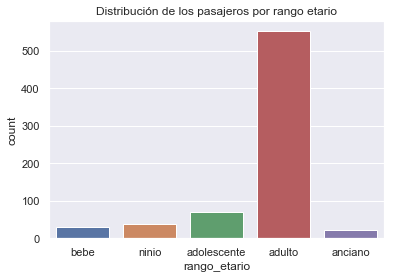

In [11]:
sns.countplot(df.rango_etario, order = ['bebe','ninio','adolescente','adulto','anciano'])
plt.title('Distribución de los pasajeros por rango etario')
plt.show()

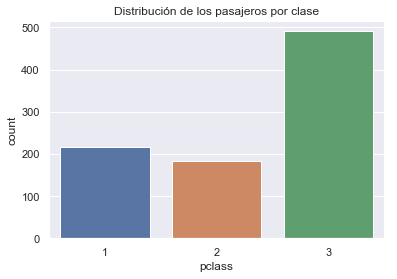

In [12]:
sns.countplot(x="pclass", data=df)
plt.title('Distribución de los pasajeros por clase')
plt.show()

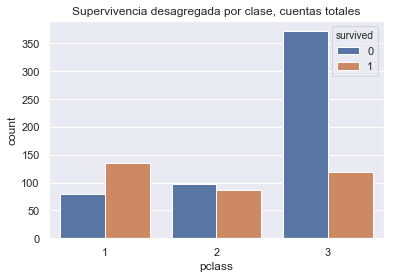

In [13]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Supervivencia desagregada por clase, cuentas totales')
plt.show()

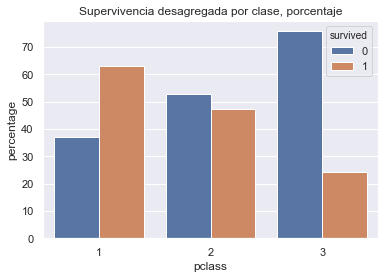

In [14]:
grouped = df.groupby(['pclass'])
pclass_counts = grouped['survived'].value_counts(normalize=True)
pclass_data = [
    {'pclass': clase, 'survived': survived, 'percentage': percentage*100} for 
    (clase, survived), percentage in dict(pclass_counts).items()]

df_pclass_data = pd.DataFrame(pclass_data)

plt.title('Supervivencia desagregada por clase, porcentaje')
sns.barplot(x="pclass", y="percentage", hue="survived", data=df_pclass_data)
plt.show()

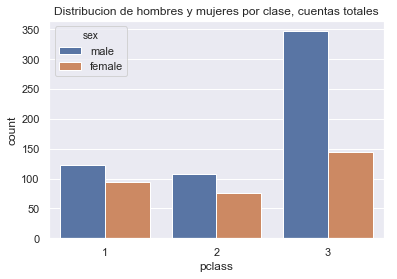

In [16]:
sns.countplot(x='pclass', hue='sex', data=df, hue_order= ['male', 'female'])
plt.title('Distribucion de hombres y mujeres por clase, cuentas totales')
plt.show()

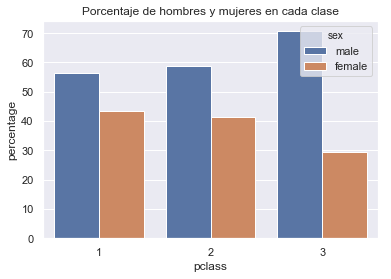

In [17]:
grouped = df.groupby(['pclass'])
pclass_counts = grouped['sex'].value_counts(normalize=True)
pclass_data = [
    {'pclass': clase, 'sex': genero, 'percentage': percentage*100} for 
    (clase, genero), percentage in dict(pclass_counts).items()]

df_pclass_data = pd.DataFrame(pclass_data)

plt.title('Porcentaje de hombres y mujeres en cada clase')
sns.barplot(x="pclass", y="percentage", hue="sex", data=df_pclass_data, hue_order= ['male', 'female'])
plt.show()

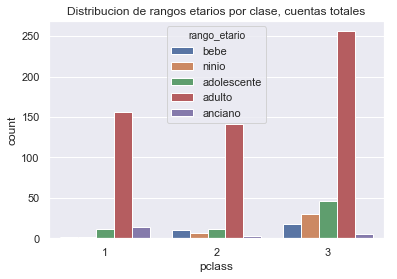

In [18]:
order = ['bebe','ninio','adolescente','adulto','anciano']

sns.countplot(x='pclass', hue='rango_etario', data=df, hue_order=order)
plt.title('Distribucion de rangos etarios por clase, cuentas totales')
plt.show()

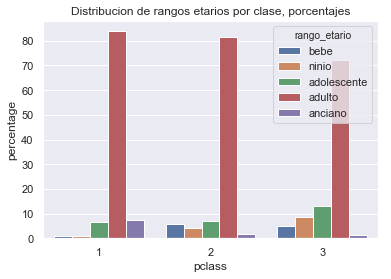

In [19]:
grouped = df.groupby(['pclass'])
pclass_counts = grouped['rango_etario'].value_counts(normalize=True)
pclass_data = [
    {'pclass': clase, 'rango_etario': rango, 'percentage': percentage*100} for 
    (clase, rango), percentage in dict(pclass_counts).items()]

df_pclass_data = pd.DataFrame(pclass_data)

plt.title('Distribucion de rangos etarios por clase, porcentajes')
sns.barplot(x="pclass", y="percentage", hue="rango_etario", data=df_pclass_data, hue_order=order)
plt.show()

Con la información que tienen hasta acá, ¿qué pueden decir acerca de la validez de la afirmación presentada?¿Qué gráficos les gustaría hacer para seguir explorando? No importa si no lo saben hacer, describirlo y explicar qué esperarían ver.

Una vez que hayan hecho eso, correr la celda de abajo (cambiar False por True).

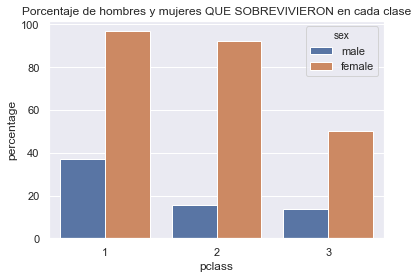

In [20]:
if True:
    grouped = df.groupby(['pclass','sex'])

    pclass_counts = grouped['survived'].value_counts(normalize=True)
    # print(pclass_counts)
    pclass_data = [
        {'pclass': clase, 'sex': genero, 'survived': survived, 'percentage': percentage*100} for 
        (clase, genero, survived), percentage in dict(pclass_counts).items()]

    df_pclass_data = pd.DataFrame(pclass_data)
    # df_pclass_data

    ## Nos quedamos solo con los que sobrevivieron
    df_pclass_data_survived = df_pclass_data[df_pclass_data.survived == 1]

    plt.title('Porcentaje de hombres y mujeres QUE SOBREVIVIERON en cada clase')
    sns.barplot(x="pclass", y="percentage", hue="sex", data=df_pclass_data_survived, hue_order= ['male', 'female'])
    plt.show()